In [1]:
import simcado as sim
import simcado
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

# Running Simulations
## Quick

In [ ]:
simcado.run(src, mode='wide', detector_layout='small', 
            cmds=None, opt_train=None, fpa=None, 
            filename=None, return_internals=False,
            filter_name=None, exptime=None, 
            **kwargs)

## In depth

In [ ]:
simcado.UserCommands(filename=None)
simcado.OpticalTrain(cmds=..., **kwargs)
simcado.Detector(cmds=..., small_fov=True)
<Source>.apply_optical_train(opt_train=..., detector=..., 
                             chips='all', sub_pixel=False, 
                             **kwargs)
<Detector>.read_out(filename=None, to_disk=False, chips=None,
                    **kwargs)

# ``simcado.source`` module

## Source Objects

In [ ]:
Source(filename=..., **kwargs)
# Or
Source(lam=..., spectra=..., x=..., y=..., 
       ref=..., weight=None, **kwargs)

### Useful methods for ``<Source>.``

In [ ]:
.apply_optical_train(opt_train=..., detector=..., 
                             chips='all', sub_pixel=False, 
                             **kwargs)
.photons_in_range(lam_min=None, lam_max=None, min_bins=10)
.image_in_range(psf=..., lam_min=..., lam_max=..., chip=..., 
                **kwargs)
.scale_spectrum(idx=0, mag=20, filter_name="Ks")
.scale_with_distance(distance_factor=...)
.rotate(angle=..., unit="arcsec", use_orig_xy=False)
.shift(dx=0, dy=0, use_orig_xy=False)
.write(filename=...)

### Functions which create point Source objects

In [ ]:
star(spec_type='A0V', mag=0, filter_name='Ks', x=0, y=0)
stars(spec_types=("A0V"), mags=(0), filter_name='Ks', 
      x=None, y=None)
star_grid(n=..., mag_min=..., mag_max=..., 
          filter_name='Ks', separation=1, spec_type='A0V')
cluster(mass=1000.0, distance=50000, half_light_radius=1)

### Functions which create extended Source objects

In [ ]:
galaxy(distance=..., half_light_radius=..., plate_scale=..., 
       magnitude=10, filter_name='Ks', normalization='total', 
       spectrum='elliptical', n=4, **kwargs)
source_from_image(images=..., lam=..., spectra=..., 
                  plate_scale=..., 
                  oversample=1, units='ph/s/m2', 
                  flux_threshold=0, center_offset=(0, 0), 
                  conserve_flux=True)
empty_sky()

## Helper functions

### For playing with spectra

All ``filter_name`` arguments accept both the name of a built-in filter (i.e. "Ks", "PaBeta" - see ``get_filter_set()``) or a ``TransmissionCurve`` object for a filter

In [ ]:
get_SED_names(path=None)
SED(spec_type=..., filter_name='V', magnitude=0.0)
flat_spectrum(mag=..., filter_name='Ks', return_ec=False)

scale_spectrum(lam=..., spec=..., mag=..., 
               filter_name='Ks', return_ec=False)
value_at_lambda(lam_i=..., lam=..., val=..., 
                return_index=False)

zero_magnitude_photon_flux(filter_name=...)
mag_to_photons(filter_name=..., magnitude=0)
photons_to_mag(filter_name=..., photons=1)
BV_to_spec_type(B_V=...)

### Spatial distribution

In [ ]:
sersic_profile(r_eff=100, n=4, ellipticity=0.5, angle=30, 
               normalization='half-light', 
               width=1024, height=1024, x_offset=0, y_offset=0)

# ``simcado.commands`` module

In [ ]:
simcado.UserCommands(filename=None)
# Or
simcado.commands.UserCommands(filename=None)

<UserCommands>.cmds   # Dictionary with all Keywords
<UserCommands>.keys   # Lists all Keywords
<UserCommands>.writeto(filename=...)
<UserCommands>["OBS_EPTIME"] = 60

## Functions to dump file templates

In [ ]:
dump_defaults(filename=None, selection="freq")
dump_chip_layout(path=None)
dump_mirror_config(path=None, what="scope")

# ``simcado.optics`` module

In [ ]:
simcado.OpticalTrain(cmds=..., **kwargs)
# Or
simcado.optics.OpticalTrain(cmds=..., **kwargs)

<OpticalTrain>.cmds
<OpticalTrain>.psf
<OpticalTrain>.ec_atmo    #(            .ec_mirror,   .ec_ao)   
<OpticalTrain>.tc_source  #(.tc_atmo,   .tc_mirror,   .tc_ao)
<OpticalTrain>.n_ph_bg    #(.n_ph_atmo, .n_ph_mirror, .n_ph_ao)
<OpticalTrain>.cmds.area  #(.diameter, .exptime, .pix_res, ...)

## Functions for getting filter curves

In [ ]:
get_filter_set(path=None)
get_filter_curve(filter_name)

# ``simcado.detector`` module

In [ ]:
simcado.Detector(cmds=..., small_fov=True)
# Or
simcado.detector.Detector(cmds=..., small_fov=True)

<Detector>.read_out(filename=None, to_disk=False, 
                    chips=None, **kwargs)
<Detector>.write(filename=None, **kwargs)
<Detector>.chips[i].array

# Miscellanous Functions and Tricks

In [ ]:
# Generate analytical PSFs or use your own
simcado.psf.poppy_eelt_psf(plan='A', wavelength=2.2, 
                           mode='wide', size=1024, 
                           segments=None, filename=None, 
                           use_pupil_mask=True, **kwargs)
simcado.psf.seeing_psf(fwhm=0.8, psf_type='moffat', size=1024, 
                       pix_res=0.004, filename=None)
simcado.psf.UserPSFCube(filename=..., lam_bin_centers=...)

# Spectral curves
simcado.spectral.BlackbodyCurve(lam, temp, **kwargs)
simcado.spectral.TransmissionCurve(filename=None, **kwargs)
# Or
simcado.spectral.TransmissionCurve(lam=None, val=None, 
                                   **kwargs)

# Complete the simcado data set
simcado.utils.get_extras()
simcado.detector.install_noise_cube(n=9)

# Find the photons arriving from a Source trough a filter
(<Source> * <TransmissionCurve>).photons_in_range()

# Get the expected photon flux on the detector without noise
<Source>.apply_optical_train(<OpticalTrain>, <Detector>)
<Detector>.chips[0].array

# Examples

## Windowed read-out

In [2]:
cmd = simcado.UserCommands()
cmd["FPA_CHIP_LAYOUT"] = """
#  id    x_cen    y_cen    x_len  y_len     gain
#        arcsec   arcsec   pixel  pixel   e-/ADU
    0        0        0      128    128      1.0
"""
fpa = simcado.Detector(cmd, small_fov=False)
fpa.layout

id,x_cen,y_cen,x_len,y_len,gain
int32,int32,int32,int32,int32,float64
0,0,0,128,128,1.0


## Home-made filter curve

In [3]:
lam = np.array([0.3, 1.27, 1.271, 1.29, 1.291, 3.0])  # in um
val = np.array([  0,    0,  0.95, 0.95,     0,   0])
tc_PaBeta = simcado.spectral.TransmissionCurve(lam=lam, 
                                               val=val)
cmd = simcado.UserCommands()
cmd["INST_FILTER_TC"] = tc_PaBeta

## 10 second PaBeta image of J=20 K0III star

In [4]:
my_star = simcado.source.star(spec_type="K0III", mag=20, 
                              filter_name="J")
hdu = simcado.run(my_star, exptime=10, filter_name=tc_PaBeta)

Detector layout
 id x_cen y_cen x_len y_len gain
--- ----- ----- ----- ----- ----
  0     0     0  1024  1024  1.0
Creating 1 layer(s) per chip
1 chip(s) will be simulated
Generating image for chip 0
Reading out chip 0


## Using ``.source_from_image()``

In [5]:
from simcado.source import *
lam, spec = SED("elliptical")
im = sersic_profile(n=4, normalization="total")
gal = source_from_image(images=im, lam=lam, spectra=spec, 
                        plate_scale=0.01, oversample=5,
                        flux_threshold=1E-6)
gal.scale_spectrum(filter_name="BrGamma", mag=16)

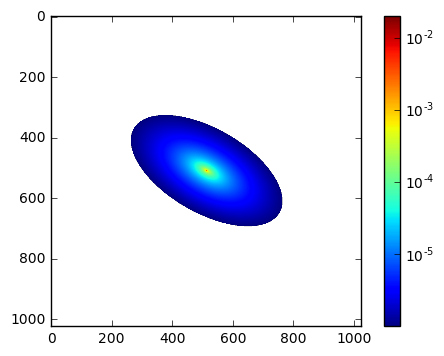

In [6]:
im2 = simcado.source.sersic_profile(n=4, normalization="total")
im2[im2<1E-6] = 0
plt.imshow(im2, norm=LogNorm())
plt.colorbar()

## Photon flux and mag in a certain filter

In [7]:
my_stars = simcado.source.stars(spec_types=("A0V", "G2V"), 
                                mags=(15,20), filter_name="V")
Jband = simcado.optics.get_filter_curve("J")
phs = (my_stars * Jband).photons_in_range()
mags = simcado.source.photons_to_mag("J", phs)
print("[Photons/s/m2]", phs)
print("J [mag] = ", mags)

[Photons/s/m2] [ 2492.1413177     77.49122153]
J [mag] =  [ 15.13109461  18.89939501]


## Print the available in-built data

In [8]:
print("Available SEDs:\n", simcado.source.get_SED_names())
print("Available Filters:\n", simcado.optics.get_filter_set())

Available SEDs:
 ['elliptical', 'interacting', 'spiral', 'starburst', 'ulirg', 'All stellar spectral types (e.g. G2V, K0III)']
Available Filters:
 ['B', 'BrGamma', 'CH4_169', 'CH4_227', 'FeII_166', 'H', 'H2O_204', 'H2_212', 'Hcont_158', 'I', 'J', 'K', 'Ks', 'NH3_153', 'PaBeta', 'R', 'U', 'V', 'Y', 'z']


## Home-made ``Source`` object from scratch

In [9]:
    ### get the spectra for 3 spectral types
lam, spec = simcado.source.SED(["A0V", "G2V", "K0III"], 
                               magnitude=[0,0,0])
    ### place them randomly in a gaussian distribution: sig=2"
x, y = np.random.normal(0, scale=2.0, size=(2, 100))    
    ### randomly assign each star a spectrum
ref = np.random.randint(0, 4, 100)
    ### give each star a magnitude between Ks=20 and Ks=28
mags = 20 + 8*np.random.random(100)
    ### weight each star relative to Ks=0
weight = simcado.source.mag_to_photons("Ks", mags) /   \
                simcado.source.zero_magnitude_photon_flux("Ks")

my_src = simcado.Source(lam=lam, spectra=spec, x=x, y=y, 
                        ref=ref, weight=weight)

## Add ``Source`` object together

In [10]:
gal.shift(-1.2,-0.3, use_orig_xy=True)
combi = my_src + gal
hdu = simcado.run(combi, exptime=3600, filter_name=tc_PaBeta, 
                  detector_layout="small")

Detector layout
 id x_cen y_cen x_len y_len gain
--- ----- ----- ----- ----- ----
  0     0     0  1024  1024  1.0
Creating 1 layer(s) per chip
1 chip(s) will be simulated
Generating image for chip 0
Reading out chip 0


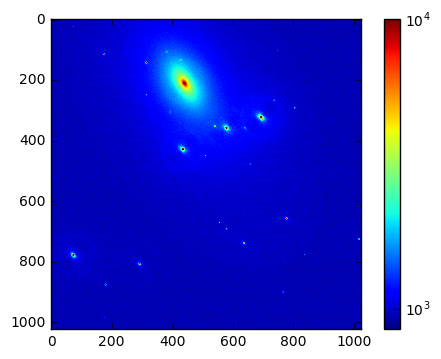

In [11]:
plt.imshow(hdu[0].data.T, norm=LogNorm(), vmax=1E4)
plt.colorbar()